In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diabeto.csv')

# Display the first few rows to inspect the dataset
print(df.head())

print(df.info())



   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age               

In [2]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [3]:
print(df.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

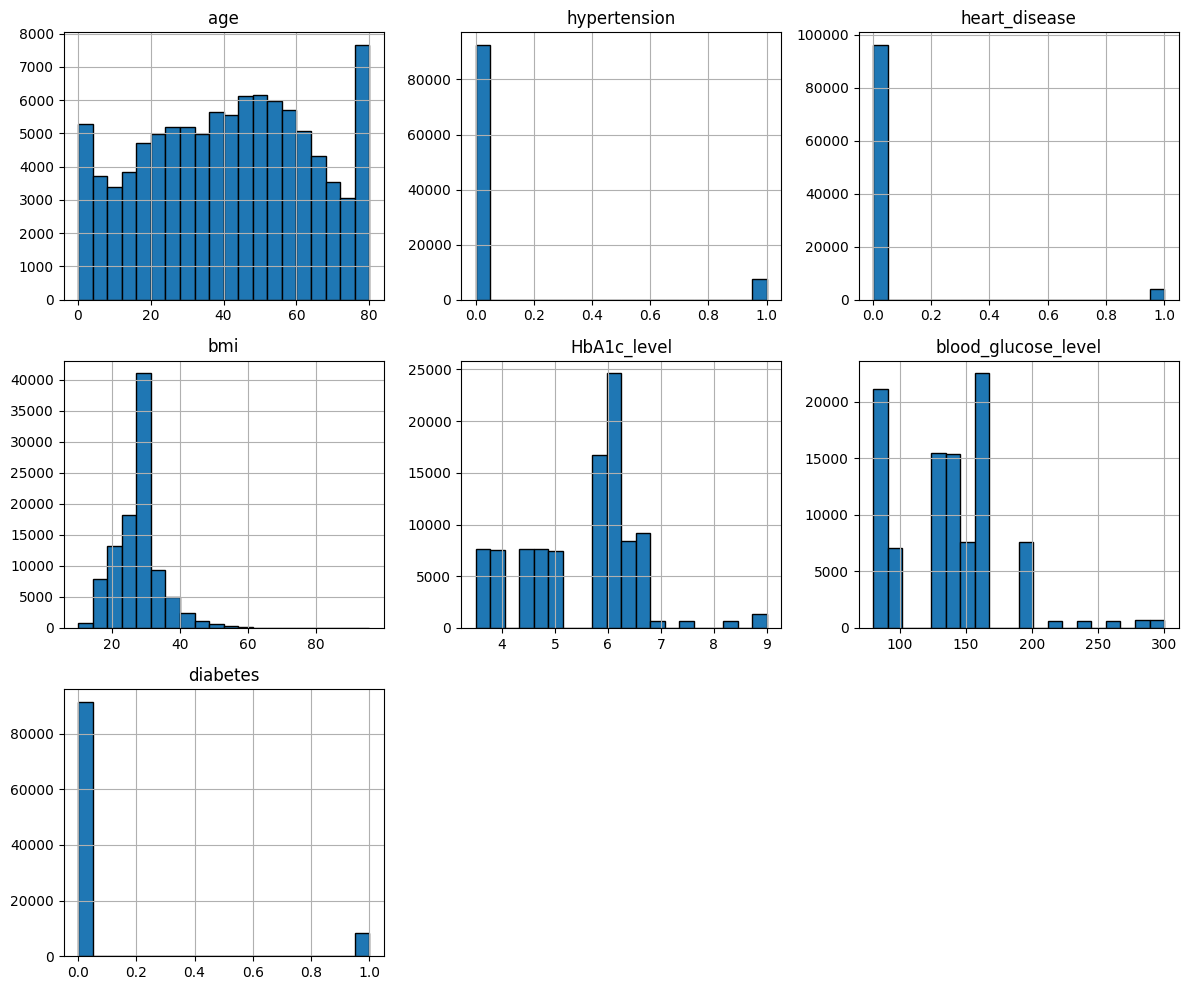

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for all numerical features
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

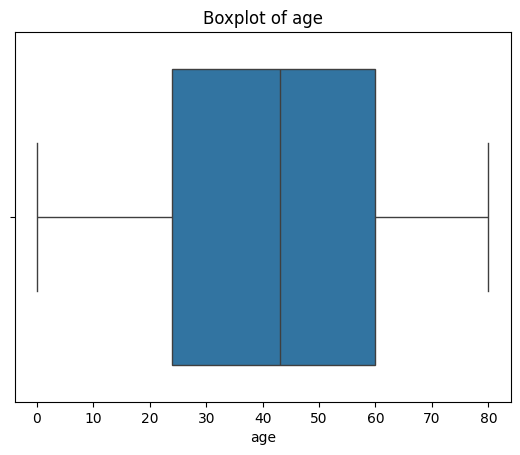

In [5]:
sns.boxplot(x=df['age'])
plt.title('Boxplot of age')
plt.show()

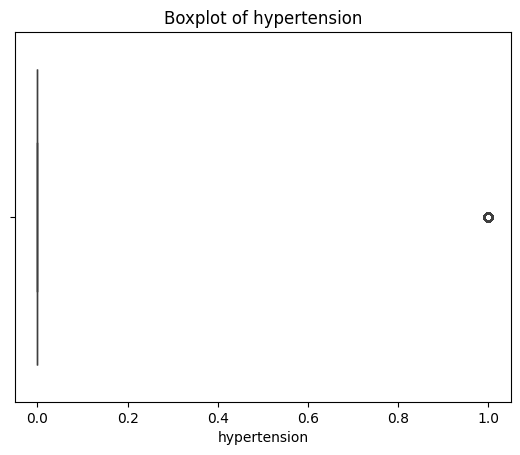

In [6]:
sns.boxplot(x=df['hypertension'])
plt.title('Boxplot of hypertension')
plt.show()

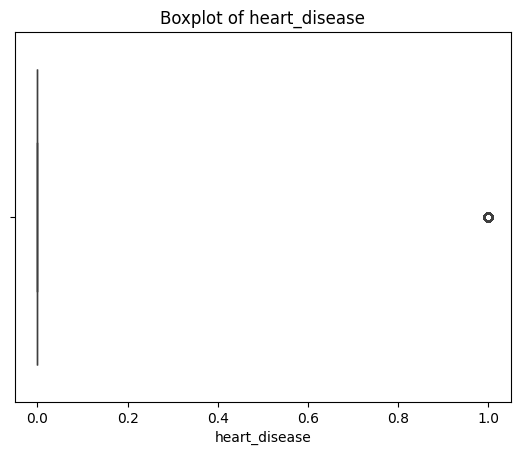

In [7]:
sns.boxplot(x=df['heart_disease'])
plt.title('Boxplot of heart_disease')
plt.show()

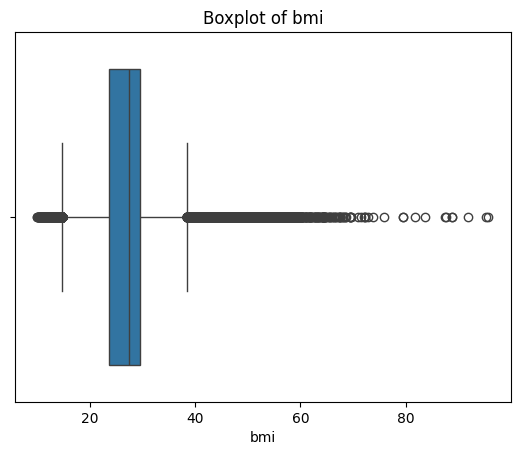

In [8]:
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of bmi')
plt.show()

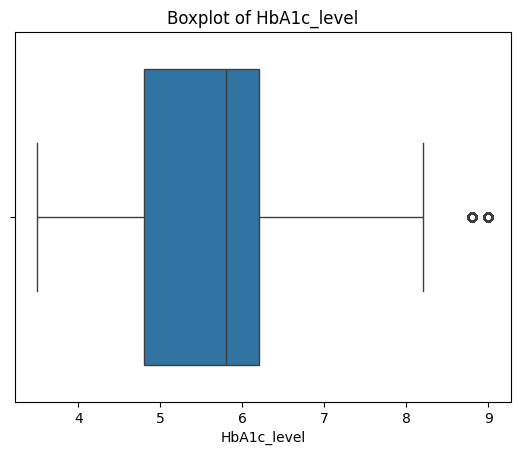

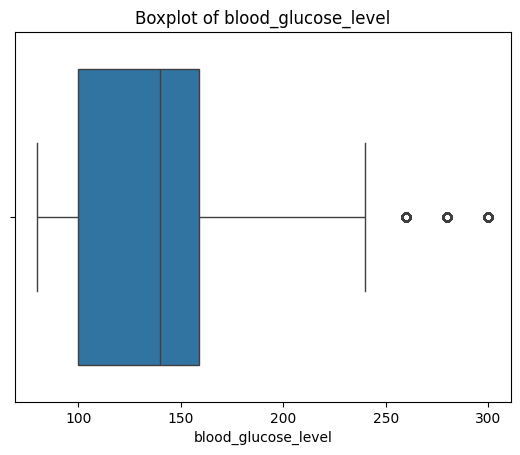

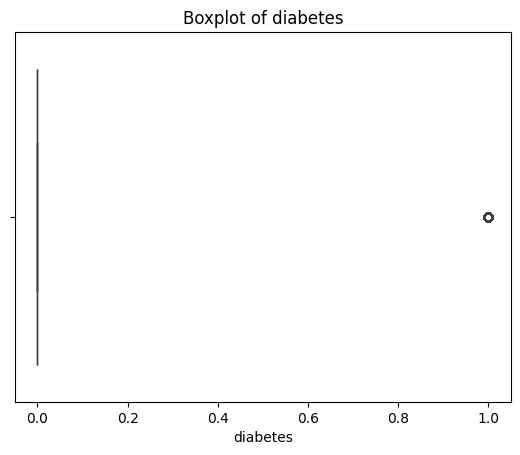

In [9]:
sns.boxplot(x=df['HbA1c_level'])
plt.title('Boxplot of HbA1c_level')
plt.show()

sns.boxplot(x=df['blood_glucose_level'])
plt.title('Boxplot of blood_glucose_level')
plt.show()

sns.boxplot(x=df['diabetes'])
plt.title('Boxplot of diabetes')
plt.show()

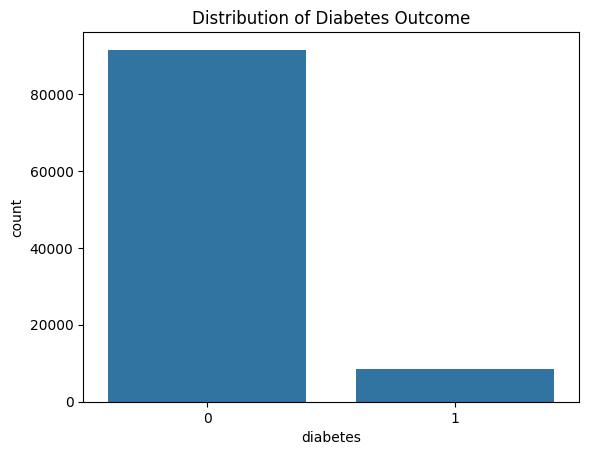

In [10]:
sns.countplot(x='diabetes', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.show()

In [11]:
df_cleaned = df.drop_duplicates()

# Verify that duplicates have been removed
print(f"Number of duplicates before cleaning: {df.duplicated().sum()}")

Number of duplicates before cleaning: 3854


In [12]:
print(f"Number of duplicates after cleaning: {df_cleaned.duplicated().sum()}")


Number of duplicates after cleaning: 0


In [13]:
df_cleaned.to_csv('diabeto_cleaned.csv', index=False)

In [14]:
unique_smoking_history = df_cleaned['smoking_history'].unique()

print("Unique values in 'smoking_history':")
print(unique_smoking_history)

Unique values in 'smoking_history':
['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [15]:
unique_gender = df_cleaned['gender'].unique()

print("Unique values in 'gender':")
print(unique_gender)

Unique values in 'gender':
['Female' 'Male' 'Other']


In [16]:
print(df_cleaned['smoking_history'].value_counts())


smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64


In [17]:
df_cleaned['smoking_history'] = df_cleaned['smoking_history'].replace('ever', 'never')

# Verify the replacement
print("Updated unique values in 'smoking_history':")
print(df_cleaned['smoking_history'].unique())

# Optional: Check the new distribution
print("Updated counts of 'smoking_history':")
print(df_cleaned['smoking_history'].value_counts())

Updated unique values in 'smoking_history':
['never' 'No Info' 'current' 'former' 'not current']
Updated counts of 'smoking_history':
smoking_history
never          38396
No Info        32887
former          9299
current         9197
not current     6367
Name: count, dtype: int64


C:\Users\Aleix\AppData\Local\Temp\ipykernel_14500\87885517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['smoking_history'] = df_cleaned['smoking_history'].replace('ever', 'never')


In [18]:
df_cleaned.to_csv('diabeto_cleaned.csv', index=False)

In [19]:
print(df_cleaned.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')
